# Credit Card Fraud Detection

* Avrupalı ​​kart sahipleri tarafından Eylül 2013'te kredi kartlarıyla yapılan işlemleri içermekte.
* 284.807 işlemden 492 dolandırıcılığın olduğu iki günde gerçekleşen işlemleri sunmakta.
* İşlem ve tutar dışında diğer sütunların ne olduğunu bilinmiyor (gizlilik nedeniyle). 
* Bilinmeyen sütunlar ölçeklendirilmiş.
* İşlem tutarları küçük -> ort 88 dolar
* Null değer yok.
* Veri çok dengesiz %99.83 normal, %0.17 dolandırıcılık işlemi
* PCA Dönüşümü: Verilerin açıklaması, tüm özelliklerin bir PCA dönüşümünden (Boyut Azaltma tekniği) geçtiğini söylüyor (zaman ve miktar hariç).
* Ölçeklendirme: Bir PCA dönüşümü uygulamak için özelliklerin önceden ölçeklendirilmesi gerekli. (Bu durumda, tüm V özellikleri ölçeklenmiştir veya en azından veri setini geliştiren kişilerin bunu yaptığını varsayıyoruz.)
* Özellikler V1, V2, … V28, PCA ile elde edilen başlıca bileşenlerdir, PCA ile dönüştürülmemiş yegane özellikler 'Zaman' ve 'Miktar'dır. 'Zaman' özelliği, her işlem ile veri kümesindeki ilk işlem arasında geçen saniyeleri içerir. 'Tutar' özelliği, işlem Tutarı'dır, bu özellik, örneğe bağlı, maliyete duyarlı öğrenme için kullanılabilir. Özellik 'Sınıf' yanıt değişkenidir ve dolandırıcılık durumunda 1, aksi takdirde 0 değerini alır.
* The Machine Learning Group of ULB (Université Libre de Bruxelles) and Worldline cooperated to collect the dataset for big data mining and fraud detection. 
    * Kaynak: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
        * Çalışmalar: 
            * https://paperswithcode.com/dataset/kaggle-credit-card-fraud-dataset
            * https://www.researchgate.net/profile/Mohammed-Al-Shabi/publication/335526336_Credit_Card_Fraud_Detection_Using_Autoencoder_Model_in_Unbalanced_Datasets/links/5f2a7901a6fdcccc43ac10d4/Credit-Card-Fraud-Detection-Using-Autoencoder-Model-in-Unbalanced-Datasets.pdf
            * https://github.com/tusharsarkar3/XBNet
            * https://arxiv.org/pdf/2106.05239v3.pdf
            * https://arxiv.org/pdf/1911.08623v1.pdf
            * https://github.com/GuansongPang/deviation-network
            * https://github.com/xuhongzuo/DeepOD
            * https://github.com/Ryosaeba8/Anomaly_detection
            * https://github.com/robeespi/Deep-Semi-supervised-intrusion-detection-on-unstructured-Hadoop-distributed-file-system-logs
            * https://github.com/robeespi/Weakly-Supervised-Malware-Detection
            * https://arxiv.org/pdf/2206.06602v2.pdf
            * https://github.com/xuhongzuo/deep-iforest
            * https://arxiv.org/pdf/2211.06675v1.pdf (+ IEEE CIS Data set)
            * https://github.com/davidnugent2425/he-cc-fraud-detection


## Kütüphanelerin Import Edilmesi

In [1]:
#!pip3 install catboost

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
from matplotlib import pyplot as plt

from sklearn import metrics
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import AdaBoostClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
import lightgbm as lgb

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.metrics import Precision, Recall, AUC
from keras.models import Sequential
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Activation, Input, Dense, LSTM
from tensorflow.keras.callbacks import EarlyStopping


import os
parent_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))

import sys
sys.path.append(parent_dir)

import balanceDataset as balance
import modelTrainingAndPerformance as mtap

import shap

# Veri Setinin Import Edilmesi

In [3]:
try:
    data = pd.read_csv('creditcard.csv')
except:
    data = pd.read_csv('creditcard.csv')

In [4]:
df = data.copy()

# Veri Seti Yapısının İncelenmesi

In [5]:
df.head() #Vx şeklindeki özellikler PCA ile dönüştürülmüş, zaman ve miktar dönüştürülmemiş

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
df.info() #null değerimiz yok

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,3.918649e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,5.682686e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-8.761736e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.811118e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,-1.552103e-15,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,2.040130e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-1.698953e-15,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,-1.893285e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-3.147640e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [8]:
def show_graphs(df):
    fraud_counts = df['Class'].value_counts()

    # pie chart
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 5))

    ax1.pie(fraud_counts, labels=['Non-fraudulent', 'Fraudulent'], colors=['lightblue', 'red'], autopct='%1.1f%%')
    ax1.set_title('Transaction Class Distribution')

    # bar plot
    ax2.bar(['Non-fraudulent', 'Fraudulent'], fraud_counts.values, color=['lightblue', 'red'])
    ax2.set_xlabel('Transaction Class')
    ax2.set_ylabel('Number of Transactions')
    ax2.set_title('Credit Card Fraud Detection')
    for i in ax2.containers:
        ax2.bar_label(i,)

    plt.show()

# Veri setimiz oldukça dengesiz

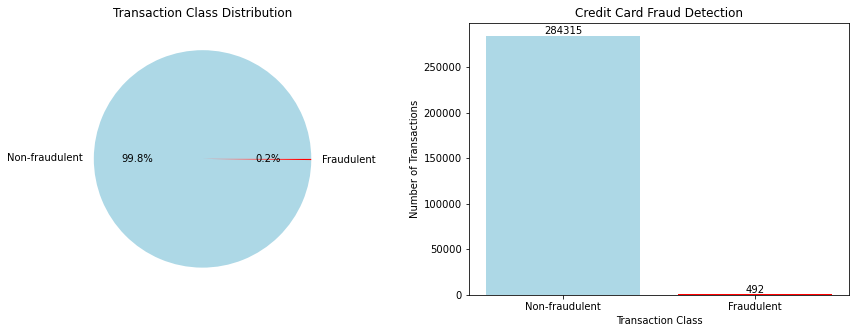

In [9]:
show_graphs(df)

In [10]:
non_fradulent_count = df['Class'].value_counts()[0]
fradulent_count = df['Class'].value_counts()[1]

print(f"Normal işlem sayısı = {non_fradulent_count} (% {non_fradulent_count/len(df)*100})")
print(f"Dolandırıcılık işlemi sayısı = {fradulent_count} (% {fradulent_count/len(df)*100})")

Normal işlem sayısı = 284315 (% 99.82725143693798)
Dolandırıcılık işlemi sayısı = 492 (% 0.1727485630620034)


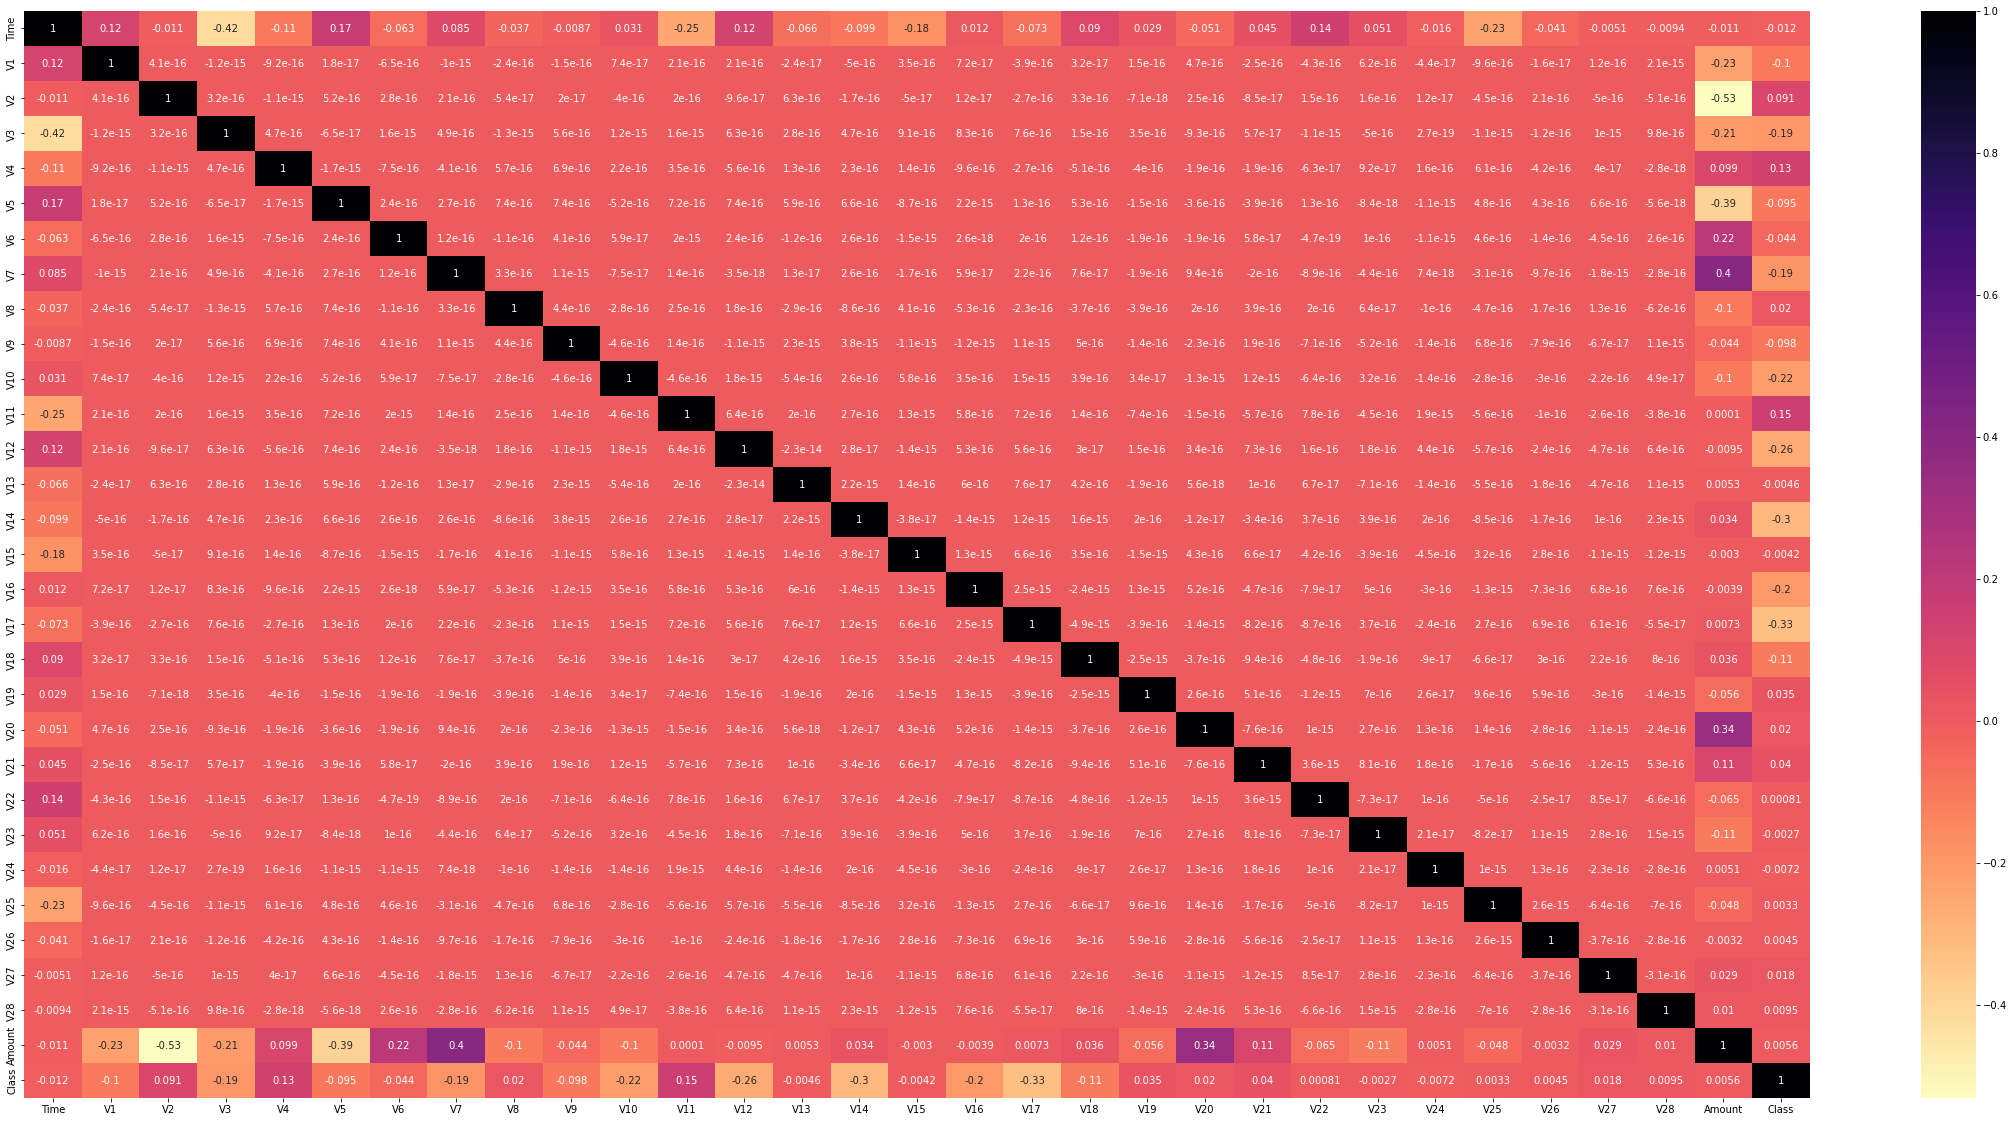

In [11]:
plt.figure(figsize = (40,20))
sns.heatmap(df.corr(), cmap="magma_r", annot=True);

# Veri Ön İşleme

* "Time" ve "amount" sütunları dışında tüm özelliklerin PCA dönüşümünden geçirildiği bilinmekte. 
Bu bilgiye dayanarak belirtilen sütunlar dışında kalan özelliklerin ölçeklendirildiği söylenebilir. 
    * Çünkü özelliklerin PCA dönüşümü geçirebilmesi için ölçeklenmesi gerekir.


In [12]:
df.drop_duplicates(inplace=True) #tekrar eden verileri temizledik

### Aykırı Değer İşlemleri

In [13]:
numeric_columns = (list(df.loc[:, 'V1':'Amount']))

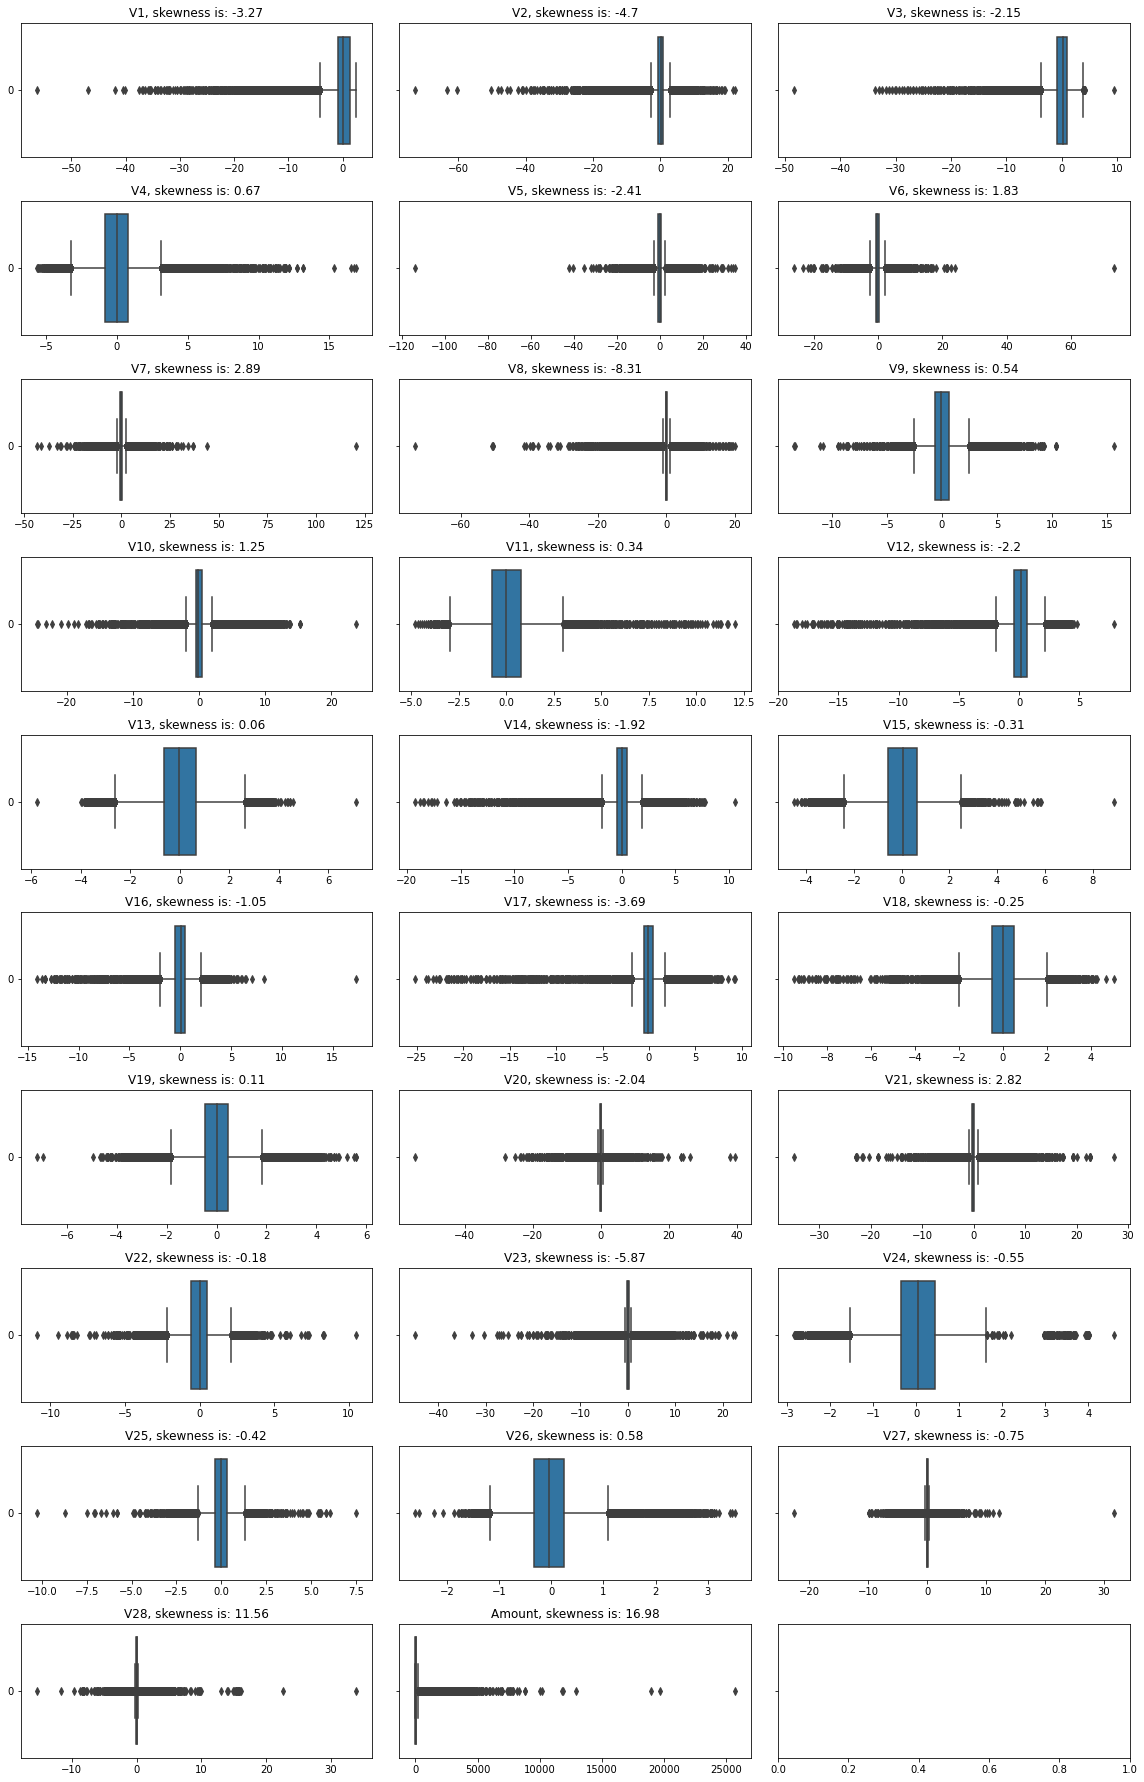

In [14]:
def boxplots_custom(dataset, columns_list, rows, cols, suptitle):
    fig, axs = plt.subplots(rows, cols, sharey=True, figsize=(16,25))
    fig.suptitle(suptitle,y=1, size=25)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        sns.boxplot(data=dataset[data], orient='h', ax=axs[i])
        axs[i].set_title(data + ', skewness is: '+str(round(dataset[data].skew(axis = 0, skipna = True),2)))
        
boxplots_custom(dataset=df, columns_list=numeric_columns, rows=10, cols=3, suptitle='')
plt.tight_layout()

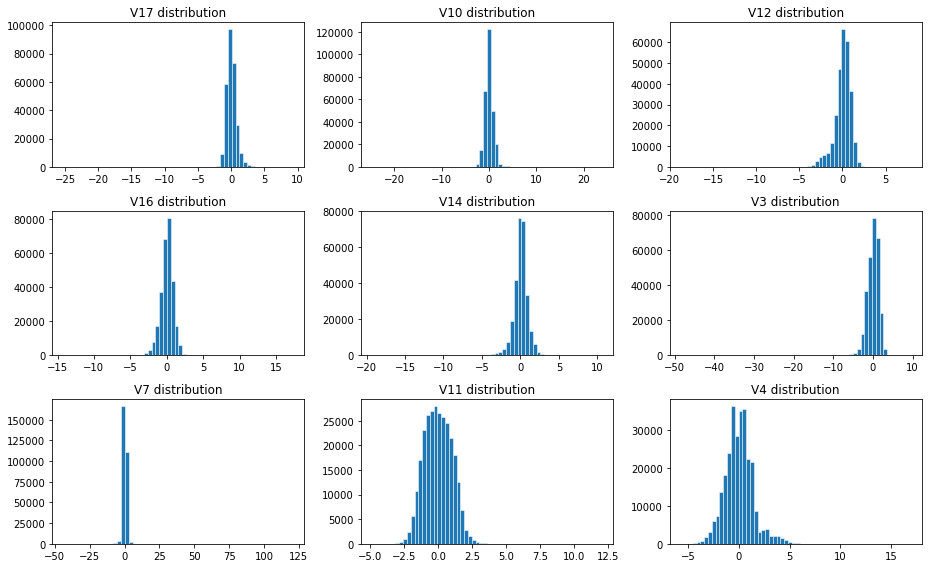

In [15]:
fig, axes = plt.subplots(nrows=3, ncols=3,figsize=(13,8))

axes[0,0].hist(df['V17'], bins=60, linewidth=0.5, edgecolor="white")
axes[0,0].set_title("V17 distribution");

axes[0,1].hist(df['V10'], bins=60, linewidth=0.5, edgecolor="white")
axes[0,1].set_title("V10 distribution");

axes[0,2].hist(df['V12'], bins=60, linewidth=0.5, edgecolor="white")
axes[0,2].set_title("V12 distribution");

axes[1,0].hist(df['V16'], bins=60, linewidth=0.5, edgecolor="white")
axes[1,0].set_title("V16 distribution");

axes[1,1].hist(df['V14'], bins=60, linewidth=0.5, edgecolor="white")
axes[1,1].set_title("V14 distribution");

axes[1,2].hist(df['V3'], bins=60, linewidth=0.5, edgecolor="white")
axes[1,2].set_title("V3 distribution");

axes[2,0].hist(df['V7'], bins=60, linewidth=0.5, edgecolor="white")
axes[2,0].set_title("V7 distribution");

axes[2,1].hist(df['V11'], bins=60, linewidth=0.5, edgecolor="white")
axes[2,1].set_title("V11 distribution");

axes[2,2].hist(df['V4'], bins=60, linewidth=0.5, edgecolor="white")
axes[2,2].set_title("V4 distribution");

plt.tight_layout()


In [16]:
def ceyrek_acikligini_bul(df, column_name):
    try:
        Q1 = df[column_name].quantile(0.25) 
        Q3 = df[column_name].quantile(0.75)
        IQR = Q3-Q1

        ust_sinir = Q3 + 1.5*IQR
        alt_sinir = Q1 - 1.5*IQR
    except TypeError:
        pass
        
    return alt_sinir, ust_sinir

In [17]:
def aykirilari_ayir(df, column_name):
    try:
        alt_sinir, ust_sinir = ceyrek_acikligini_bul(df,column_name)
        aykiri_tf_alt = df[column_name] < alt_sinir
        aykiri_tf_ust = df[column_name] > ust_sinir
        
        if alt_sinir == ust_sinir == 0:
            df[column_name][aykiri_tf_alt] = 0 #(?)
            df[column_name][aykiri_tf_ust] = 1
        
        else:
            df[column_name][aykiri_tf_alt] = alt_sinir  
            df[column_name][aykiri_tf_ust] = ust_sinir
        
        #print("Aykirilari Ayir calisti!")
        print("Aykiri_tf_alt: ", alt_sinir)
        print("Aykiri_tf_ust: ", ust_sinir)
        #print("Unique: ", df[column_name].unique())

    except:
        print("Aykirilari Ayir hata!")
        pass

In [18]:
for column in df.columns:
    print("********************************* Sütun İsmi: ",column," *********************************")
    aykirilari_ayir(df, column)

********************************* Sütun İsmi:  Time  *********************************
Aykiri_tf_alt:  -73435.125
Aykiri_tf_ust:  266937.875
********************************* Sütun İsmi:  V1  *********************************
Aykiri_tf_alt:  -4.263979957375013
Aykiri_tf_ust:  4.66409638031512
********************************* Sütun İsmi:  V2  *********************************
Aykiri_tf_alt:  -2.7012257535647324
Aykiri_tf_ust:  2.901188080680856
********************************* Sütun İsmi:  V3  *********************************
Aykiri_tf_alt:  -3.7646449731967664
Aykiri_tf_ust:  3.901922942775768
********************************* Sütun İsmi:  V4  *********************************
Aykiri_tf_alt:  -3.234806612822964
Aykiri_tf_ust:  3.124319110867031
********************************* Sütun İsmi:  V5  *********************************
Aykiri_tf_alt:  -2.6429012689627394
Aykiri_tf_ust:  2.565289501788516
********************************* Sütun İsmi:  V6  *********************************
Ay


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


********************************* Sütun İsmi:  V14  *********************************
Aykiri_tf_alt:  -1.802834475317419
Aykiri_tf_ust:  1.8694375506322691
********************************* Sütun İsmi:  V15  *********************************
Aykiri_tf_alt:  -2.428785787237029
Aykiri_tf_ust:  2.4974380585726976
********************************* Sütun İsmi:  V16  *********************************
Aykiri_tf_alt:  -1.952416410433839
Aykiri_tf_ust:  2.0090683754969976
********************************* Sütun İsmi:  V17  *********************************
Aykiri_tf_alt:  -1.8082765194756665
Aykiri_tf_ust:  1.723320651441012
********************************* Sütun İsmi:  V18  *********************************
Aykiri_tf_alt:  -1.997969244031534
Aykiri_tf_ust:  2.0019106106399303
********************************* Sütun İsmi:  V19  *********************************
Aykiri_tf_alt:  -1.8284841911416798
Aykiri_tf_ust:  1.8307032086348134
********************************* Sütun İsmi:  V20  ***********


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


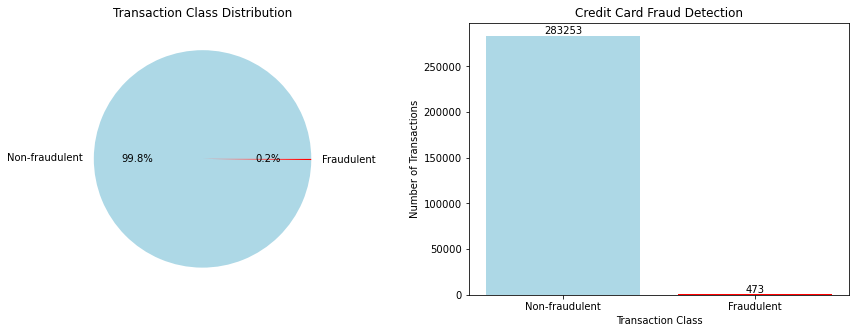

In [19]:
show_graphs(df)

In [20]:
non_fradulent_count = df['Class'].value_counts()[0]
fradulent_count = df['Class'].value_counts()[1]

print(f"Normal işlem sayısı = {non_fradulent_count} (% {non_fradulent_count/len(df)*100})")
print(f"Dolandırıcılık işlemi sayısı = {fradulent_count} (% {fradulent_count/len(df)*100})")

Normal işlem sayısı = 283253 (% 99.83328986416473)
Dolandırıcılık işlemi sayısı = 473 (% 0.1667101358352777)


In [21]:
df["Class"].unique()

array([0, 1], dtype=int64)

## Feature Selection

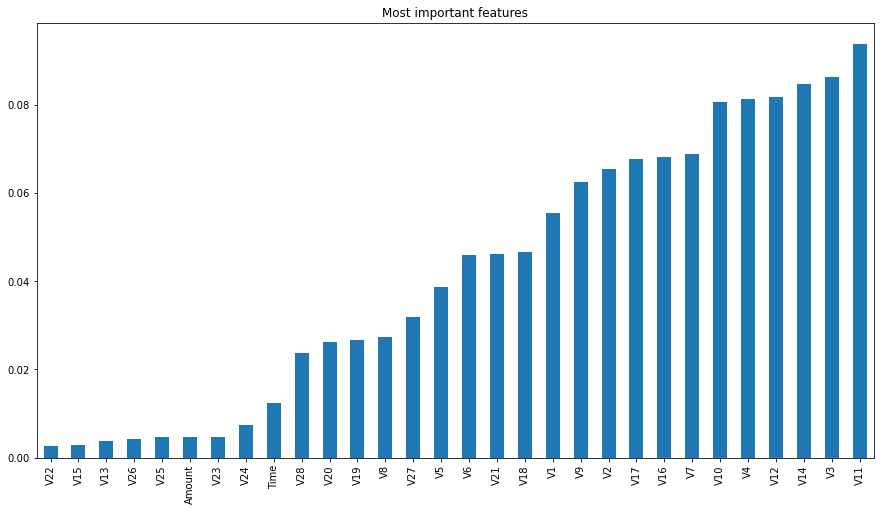

In [22]:
plt.figure(figsize=(15,8))
d = df.corr()['Class'][:-1].abs().sort_values().plot(kind='bar', title='Most important features')

plt.show()

In [23]:
#selected_features = (df.corr()['Class'][:-1].abs() > 0.15)
selected_features = df.corr()['Class'][:-1].abs().sort_values().tail(14)
df_selected= selected_features.to_frame().reset_index()
selected_featues = df_selected['index']

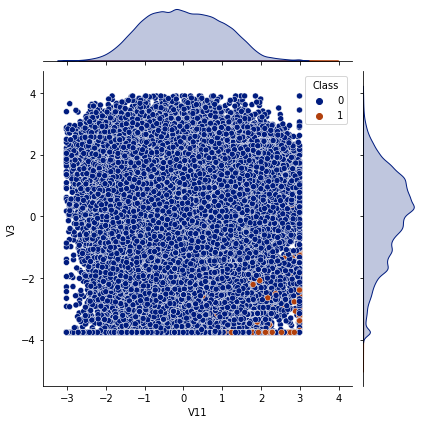

In [24]:
sns.jointplot(x='V11', y='V3',hue='Class', data=df, palette = 'dark')

Creating legend with loc="best" can be slow with large amounts of data.


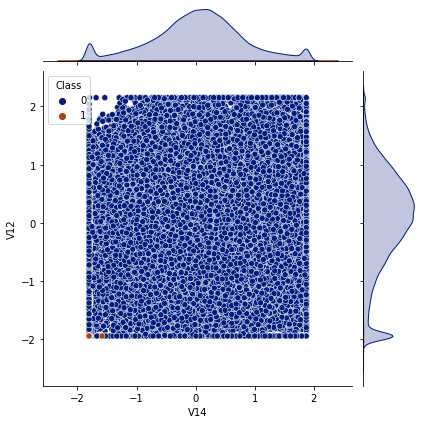

In [25]:
sns.jointplot(x='V14', y='V12',hue='Class', data=df, palette = 'dark')

# Veri Setinin Bölünmesi

### Stratified Splitting


* Bu veri kümesi bölümleri genellikle bir hedef değişkene göre rastgele oluşturulur. 
Ancak bunu yaparken, özellikle küçük veri kümeleri söz konusu olduğunda, 
hedef değişkenin farklı bölümler arasındaki oranları farklılık gösterebilir.

* Bu teknik ile, bölünmüş olan training ve test parçalarında eşit oranda sınıf yüzdesi sağlanmış olur.


In [26]:
amount = df['Amount'].values.reshape(-1, 1)

scaler = StandardScaler()
amount_scaled = scaler.fit_transform(amount)

df['Amount'] = amount_scaled

In [27]:
X = df[selected_featues]
y = df['Class']

In [28]:
#X = df.drop('Class', axis=1)
#y = df['Class']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = 0.3, random_state = 85)

# Model Oluşturma

## Oversample/Undersample Tekniklerinin Uygulanması

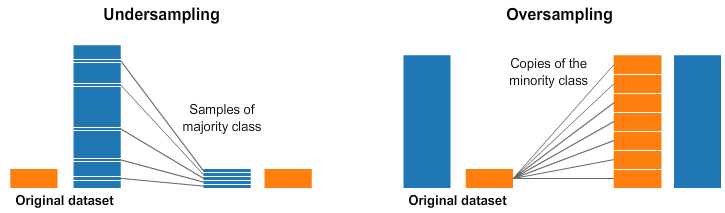

* Bu noktada göz önünde bulundurulması gereken en önemli etken veri setinin kullanılacak olan teknikten önce bölünmüş olmasıdır. Bunun asıl amacı test setinin veri yapısını bozmamaktır.

* Veri setini bölmeden oversampling tekniğinin uygulanması, aynı gözlemlerin hem test hem de training setlerinde 
bulunmasına sebebiyet verebilir. Bu, modelin yalnızca belirli veri noktalarını ezberlemesine neden olabilir, 
overfitting ve test verilerinde zayıf genellemeye neden olabilir. Veri sızıntısı, tamamen geçersiz olmasa da 
aşırı iyimser tahmin modelleri oluşturulmasına sebep olabilir.
    * Veri sızıntısı eğitim veri kümesinin dışından olan bilgiler ile model üretmek için kullanıldığı zaman ortaya çıkar.


### Random Oversampling

In [30]:
# Örnekleme ile veri arttırması kaynaklı olarak Overfittinge sebep olabilir.

In [31]:
X_train_ros, y_train_ros = balance.balancedWithRandomOverSampler(X_train,y_train)

Non-Frauds: 198277 / 50.0 % of the dataset
Frauds: 198277 / 50.0 % of the dataset


### Random Undersampling

In [32]:
# Verilerin kasıtlı azaltılması sonucu Underfittinge sebep olabilir. 

In [33]:
X_train_rus, y_train_rus = balance.balancedWithRandomUnderSampler(X_train,y_train)

Non-Frauds: 331 / 50.0 % of the dataset
Frauds: 331 / 50.0 % of the dataset


### SMOTE

* SMOTE (Synthetic Minority Oversampling Technique), azınlık sınıfı için öğeleri sentezler. SMOTE, özellik uzayında yakın olan örnekleri seçerek, özellik uzayındaki örnekler arasında bir çizgi çizerek ve bu çizgi boyunca bir noktada yeni bir örnek çizerek çalışır.

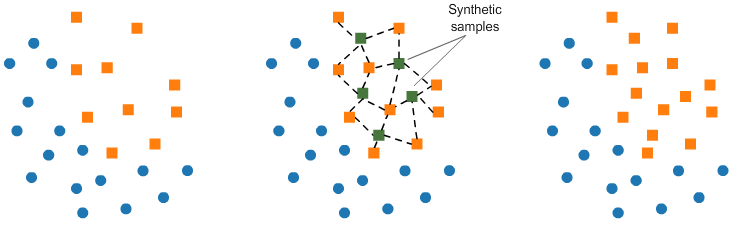

In [34]:
X_train_smote, y_train_smote = balance.balanceWithSMOTE(X_train, y_train)

Non-Frauds: 198277 / 50.0 % of the dataset
Frauds: 198277 / 50.0 % of the dataset


### ADASYN

In [35]:
X_train_adasyn, y_train_adasyn = balance.balanceWithADASYN(X_train, y_train)

Non-Frauds: 198277 / 50.0 % of the dataset
Frauds: 198266 / 50.0 % of the dataset


## Model Oluşturma ve Eğitme

In [36]:
ml_models = [ lgb.LGBMClassifier()] 
             #, AdaBoostClassifier(),GradientBoostingClassifier(),
             #CatBoostClassifier(),XGBClassifier()]
             


In [37]:
for i in ml_models:
    mtap.model_performance(i, X_train, X_test, y_train, y_test, "baseline")
    mtap.model_performance(i, X_train_ros, X_test, y_train_ros, y_test, "RandomOverSampler")
    mtap.model_performance(i, X_train_rus, X_test, y_train_rus, y_test, "RandomUnderSampler")
    mtap.model_performance(i, X_train_smote, X_test, y_train_smote, y_test, "SMOTE")
    mtap.model_performance(i, X_train_adasyn, X_test, y_train_adasyn, y_test, "ADASYN")

***** LGBMClassifier_baseline DONE *****
***** LGBMClassifier_RandomOverSampler DONE *****
***** LGBMClassifier_RandomUnderSampler DONE *****
***** LGBMClassifier_SMOTE DONE *****
***** LGBMClassifier_ADASYN DONE *****


In [38]:
#mtap.all_performances.sort_values(by=['f1_score'], ascending=False)

In [39]:
mtap.all_performances.sort_values(by=['f1_score','AUC'], ascending=False)

,model_name,precision,recall,f1_score,AUC
1,LGBMClassifier_RandomOverSampler,0.737179,0.809859,0.771812,0.904688
3,LGBMClassifier_SMOTE,0.304239,0.859155,0.449355,0.927936
4,LGBMClassifier_ADASYN,0.200000,0.852113,0.323963,0.923208
0,LGBMClassifier_baseline,0.106952,0.140845,0.121581,0.569440
2,LGBMClassifier_RandomUnderSampler,0.036359,0.908451,0.069919,0.934108


## Performansların Karşılaştırılması

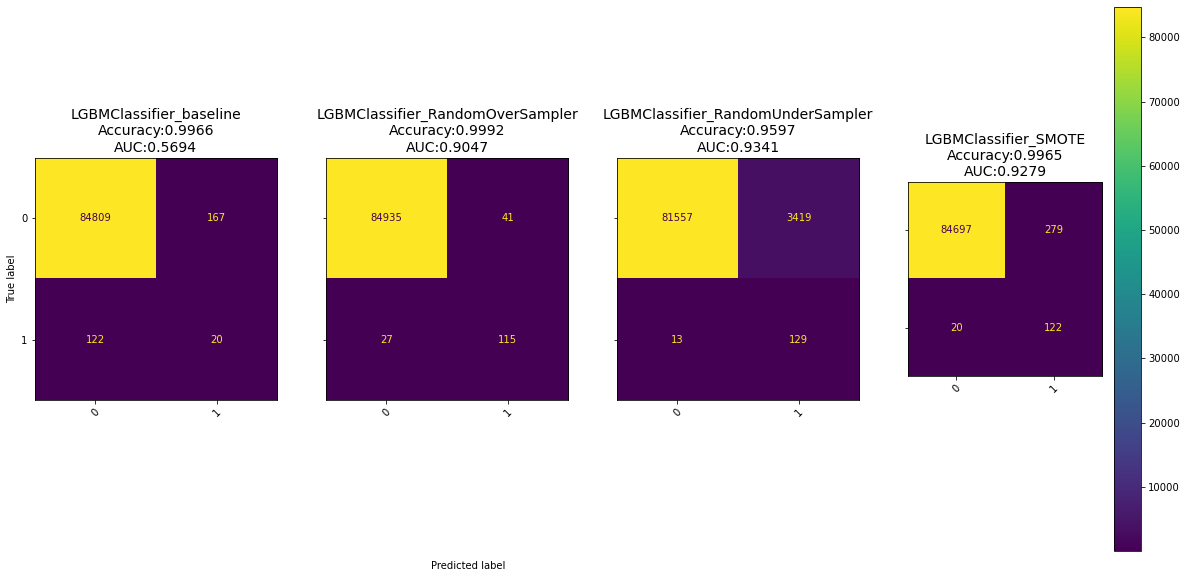

In [40]:
mtap.display_all_confusion_matrices(y_test)

# Deep Learning

## Preprocessing

In [41]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [42]:
optimizer = 'adam'
loss = 'binary_crossentropy'
metrics=[Precision(), Recall()]

In [43]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=2, patience=35)

In [44]:
def y_pred_for_DLModels(model, X_test):
    y_pred = model.predict(X_test)
    y_pred_binary = (y_pred > 0.5).flatten()
    return y_pred_binary

### Artificial Neural Network (ANN)

In [45]:
#X_train_scaled, X_test_scaled = preprocessing(df)

In [46]:
# Build the ANN model
ANN_model = keras.Sequential([
    layers.Dense(32, activation='relu', input_shape=[X_train.shape[1]]),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(1, activation='sigmoid')
])

In [47]:
# Compile the model
ANN_model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

In [48]:
# Train the model
history = ANN_model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=10, batch_size=64, callbacks=[early_stop])

Epoch 1/10
2483/2483 [==============================] - 5s 2ms/step - loss: 0.0323 - precision: 0.2677 - recall: 0.2861 - val_loss: 0.0030 - val_precision: 0.9298 - val_recall: 0.7794
Epoch 2/10
2483/2483 [==============================] - 3s 1ms/step - loss: 0.0037 - precision: 0.8081 - recall: 0.7361 - val_loss: 0.0032 - val_precision: 0.9016 - val_recall: 0.8088
Epoch 3/10
2483/2483 [==============================] - 3s 1ms/step - loss: 0.0039 - precision: 0.8416 - recall: 0.7567 - val_loss: 0.0032 - val_precision: 0.9153 - val_recall: 0.7941
Epoch 4/10
2483/2483 [==============================] - 3s 1ms/step - loss: 0.0035 - precision: 0.8531 - recall: 0.7579 - val_loss: 0.0032 - val_precision: 0.9180 - val_recall: 0.8235
Epoch 5/10
2483/2483 [==============================] - 3s 1ms/step - loss: 0.0029 - precision: 0.8302 - recall: 0.7813 - val_loss: 0.0029 - val_precision: 0.9016 - val_recall: 0.8088
Epoch 6/10
2483/2483 [==============================] - 3s 1ms/step - loss: 0.00

In [49]:
# Evaluate the model on the test set
test_loss, precision, recall= ANN_model.evaluate(X_test_scaled, y_test)

2660/2660 [==============================] - 2s 618us/step - loss: 0.0034 - precision: 0.8129 - recall: 0.7958


In [50]:
F1 = 2 * (precision * recall) / (precision + recall)
F1

0.8042704663111385

In [51]:
y_pred = y_pred_for_DLModels(ANN_model, X_test_scaled)

In [52]:
mtap.calculate_scores(X_train_scaled, X_test_scaled, y_train, y_test, y_pred, "ANN", ANN_model)

### CNN

In [53]:
#X_train_scaled, X_test_scaled = preprocessing(df)

In [54]:
X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

In [55]:
# define the CNN model
CNN_model = keras.Sequential([
    layers.Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train_scaled.shape[1], 1)),
    layers.MaxPooling1D(pool_size=2),
    layers.Conv1D(filters=64, kernel_size=3, activation='relu'),
    layers.MaxPooling1D(pool_size=2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [56]:
# compile the model
CNN_model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

In [57]:
# train the model
history = CNN_model.fit(X_train_reshaped, y_train, validation_data=(X_test_reshaped, y_test), epochs=10)

Epoch 1/10
6207/6207 [==============================] - 15s 2ms/step - loss: 0.0115 - precision: 0.8312 - recall: 0.6627 - val_loss: 0.0036 - val_precision: 0.8361 - val_recall: 0.7183
Epoch 2/10
6207/6207 [==============================] - 11s 2ms/step - loss: 0.0034 - precision: 0.8271 - recall: 0.7570 - val_loss: 0.0035 - val_precision: 0.8209 - val_recall: 0.7746
Epoch 3/10
6207/6207 [==============================] - 11s 2ms/step - loss: 0.0032 - precision: 0.8465 - recall: 0.7755 - val_loss: 0.0037 - val_precision: 0.8333 - val_recall: 0.7394
Epoch 4/10
6207/6207 [==============================] - 11s 2ms/step - loss: 0.0035 - precision: 0.8204 - recall: 0.7350 - val_loss: 0.0035 - val_precision: 0.8248 - val_recall: 0.7958
Epoch 5/10
6207/6207 [==============================] - 11s 2ms/step - loss: 0.0036 - precision: 0.8604 - recall: 0.7235 - val_loss: 0.0034 - val_precision: 0.8385 - val_recall: 0.7676
Epoch 6/10
6207/6207 [==============================] - 11s 2ms/step - loss

In [58]:
# evaluate the model on test set
test_loss, precision, recall = CNN_model.evaluate(X_test_reshaped, y_test)

2660/2660 [==============================] - 2s 670us/step - loss: 0.0035 - precision: 0.8409 - recall: 0.7817


In [59]:
F1 = 2 * (precision * recall) / (precision + recall)
F1

0.8102189547036591

In [60]:
y_pred = y_pred_for_DLModels(CNN_model, X_test_reshaped)

In [61]:
mtap.calculate_scores(X_train_reshaped, X_test_reshaped, y_train, y_test, y_pred, "CNN", CNN_model)

### Autoencoders

In [62]:
input_dim = X_train_scaled.shape[1]
encoding_dim = 32

input_layer = Input(shape=(input_dim,))
encoder = Dense(encoding_dim, activation='relu')(input_layer)
decoder = Dense(input_dim, activation='sigmoid')(encoder)

autoencoder = Model(inputs=input_layer, outputs=decoder)

In [63]:
# Compile and train the autoencoder
autoencoder.compile(optimizer=optimizer, loss=loss, metrics=metrics)
autoencoder.fit(X_train_scaled, X_train_scaled, epochs=10, batch_size=128, shuffle=True, validation_data=(X_test_scaled, X_test_scaled))

Epoch 1/10
1552/1552 [==============================] - 2s 1ms/step - loss: -8.7615 - precision: 0.9998 - recall: 0.1748 - val_loss: -88.0284 - val_precision: 1.0000 - val_recall: 0.1346
Epoch 2/10
1552/1552 [==============================] - 2s 1ms/step - loss: -139.0229 - precision: 1.0000 - recall: 0.1342 - val_loss: -334.2264 - val_precision: 1.0000 - val_recall: 0.1355
Epoch 3/10
1552/1552 [==============================] - 2s 1ms/step - loss: -413.9440 - precision: 1.0000 - recall: 0.1349 - val_loss: -695.9274 - val_precision: 1.0000 - val_recall: 0.1364
Epoch 4/10
1552/1552 [==============================] - 2s 1ms/step - loss: -794.9674 - precision: 1.0000 - recall: 0.1355 - val_loss: -1160.2955 - val_precision: 1.0000 - val_recall: 0.1371
Epoch 5/10
1552/1552 [==============================] - 2s 1ms/step - loss: -1277.5821 - precision: 1.0000 - recall: 0.1360 - val_loss: -1720.7859 - val_precision: 1.0000 - val_recall: 0.1374
Epoch 6/10
1552/1552 [============================

In [64]:
# Obtain the reconstructed outputs
reconstructed_X_test = autoencoder.predict(X_test_scaled)

In [65]:
# Calculate the reconstruction error
mse = np.mean(np.power(X_test_scaled - reconstructed_X_test, 2), axis=1)

In [66]:
# Set a threshold for anomaly detection
threshold = np.percentile(mse, 95)

In [67]:
# Classify samples as normal or fraud based on the threshold
y_pred = np.where(mse > threshold, 1, 0)

In [68]:
#mtap.calculate_scores(X_train_scaled, X_test_scaled, y_train, y_test, y_pred, "Autoencoder_2", autoencoder)

In [69]:
#test_loss, precision, recall = autoencoder.evaluate(reconstructed_X_test, y_test)

In [70]:
F1 = 2 * (precision * recall) / (precision + recall)
F1

0.8102189547036591

### RNN

In [71]:
# Reshape the input data for RNN
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

In [72]:
# Define the RNN model
RNN_model = Sequential()
RNN_model.add(LSTM(64, input_shape=(1, X_train_scaled.shape[1]), activation='relu'))
RNN_model.add(Dense(1, activation='sigmoid'))

In [73]:
# Compile and train the RNN model
RNN_model.compile(optimizer=optimizer, loss=loss, metrics=metrics)
RNN_model.fit(X_train_reshaped, y_train, epochs=10, batch_size=128, validation_data=(X_test_reshaped, y_test))

Epoch 1/10
1552/1552 [==============================] - 4s 2ms/step - loss: 0.1651 - precision: 0.9962 - recall: 0.1376 - val_loss: 0.0041 - val_precision: 0.8450 - val_recall: 0.7676
Epoch 2/10
1552/1552 [==============================] - 3s 2ms/step - loss: 0.0036 - precision: 0.8655 - recall: 0.7529 - val_loss: 0.0037 - val_precision: 0.8409 - val_recall: 0.7817
Epoch 3/10
1552/1552 [==============================] - 3s 2ms/step - loss: 0.0037 - precision: 0.8348 - recall: 0.7625 - val_loss: 0.0036 - val_precision: 0.8617 - val_recall: 0.5704
Epoch 4/10
1552/1552 [==============================] - 3s 2ms/step - loss: 0.0032 - precision: 0.7935 - recall: 0.7239 - val_loss: 0.0034 - val_precision: 0.8527 - val_recall: 0.7746
Epoch 5/10
1552/1552 [==============================] - 3s 2ms/step - loss: 0.0028 - precision: 0.8727 - recall: 0.7843 - val_loss: 0.0033 - val_precision: 0.8473 - val_recall: 0.7817
Epoch 6/10
1552/1552 [==============================] - 3s 2ms/step - loss: 0.00

In [74]:
y_pred = y_pred_for_DLModels(RNN_model, X_test_reshaped)

In [75]:
mtap.calculate_scores(X_train_reshaped, X_test_reshaped, y_train, y_test, y_pred, "RNN", RNN_model)

In [76]:
test_loss,precision, recall = RNN_model.evaluate(X_test_reshaped, y_test)

2660/2660 [==============================] - 2s 737us/step - loss: 0.0031 - precision: 0.8527 - recall: 0.7746


In [77]:
f1 = 2 * (precision * recall) / (precision + recall)
print('F1 Score:', f1)

F1 Score: 0.8118081155700934


### LSTM

In [78]:
## Reshape the input data for LSTM
X_train_reshaped = np.reshape(X_train_scaled, (X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = np.reshape(X_test_scaled, (X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

In [79]:
# Define the LSTM model
LSTM_model = Sequential()
LSTM_model.add(LSTM(64, input_shape=(1, X_train_scaled.shape[1]), activation='relu'))
LSTM_model.add(Dense(1, activation='sigmoid'))


In [80]:
# Compile and train the LSTM model
LSTM_model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

In [81]:
LSTM_model.fit(X_train_reshaped, y_train, epochs=10, batch_size=128, validation_data=(X_test_reshaped, y_test))

Epoch 1/10
1552/1552 [==============================] - 4s 2ms/step - loss: 0.1634 - precision: 0.1955 - recall: 0.5815 - val_loss: 0.0040 - val_precision: 0.8583 - val_recall: 0.7676
Epoch 2/10
1552/1552 [==============================] - 3s 2ms/step - loss: 0.0033 - precision: 0.8265 - recall: 0.7494 - val_loss: 0.0034 - val_precision: 0.8571 - val_recall: 0.7606
Epoch 3/10
1552/1552 [==============================] - 3s 2ms/step - loss: 0.0033 - precision: 0.8673 - recall: 0.7643 - val_loss: 0.0035 - val_precision: 0.8409 - val_recall: 0.7817
Epoch 4/10
1552/1552 [==============================] - 3s 2ms/step - loss: 0.0032 - precision: 0.8584 - recall: 0.7953 - val_loss: 0.0033 - val_precision: 0.8450 - val_recall: 0.7676
Epoch 5/10
1552/1552 [==============================] - 3s 2ms/step - loss: 0.0026 - precision: 0.8425 - recall: 0.7813 - val_loss: 0.0032 - val_precision: 0.8504 - val_recall: 0.7606
Epoch 6/10
1552/1552 [==============================] - 3s 2ms/step - loss: 0.00

In [82]:
y_pred = y_pred_for_DLModels(LSTM_model, X_test_reshaped)

In [83]:
mtap.calculate_scores(X_train_reshaped, X_test_reshaped, y_train, y_test, y_pred, "LSTM", LSTM_model)

In [84]:
test_loss, precision, recall = LSTM_model.evaluate(X_test_reshaped, y_test)

2660/2660 [==============================] - 2s 726us/step - loss: 0.0033 - precision: 0.8864 - recall: 0.5493


In [85]:
f1 = 2 * (precision * recall) / (precision + recall)
print('F1 Score:', f1)

F1 Score: 0.6782608727922059


In [86]:
mtap.all_performances.sort_values(by=['f1_score','AUC'], 
                                  ascending=False).reset_index(drop=True)

,model_name,precision,recall,f1_score,AUC
0,RNN,0.852713,0.774648,0.811808,0.887212
1,CNN,0.840909,0.781690,0.810219,0.890722
2,ANN,0.812950,0.795775,0.804270,0.897734
3,LGBMClassifier_RandomOverSampler,0.737179,0.809859,0.771812,0.904688
4,LSTM,0.886364,0.549296,0.678261,0.774589
5,LGBMClassifier_SMOTE,0.304239,0.859155,0.449355,0.927936
6,LGBMClassifier_ADASYN,0.200000,0.852113,0.323963,0.923208
7,LGBMClassifier_baseline,0.106952,0.140845,0.121581,0.569440
8,LGBMClassifier_RandomUnderSampler,0.036359,0.908451,0.069919,0.934108


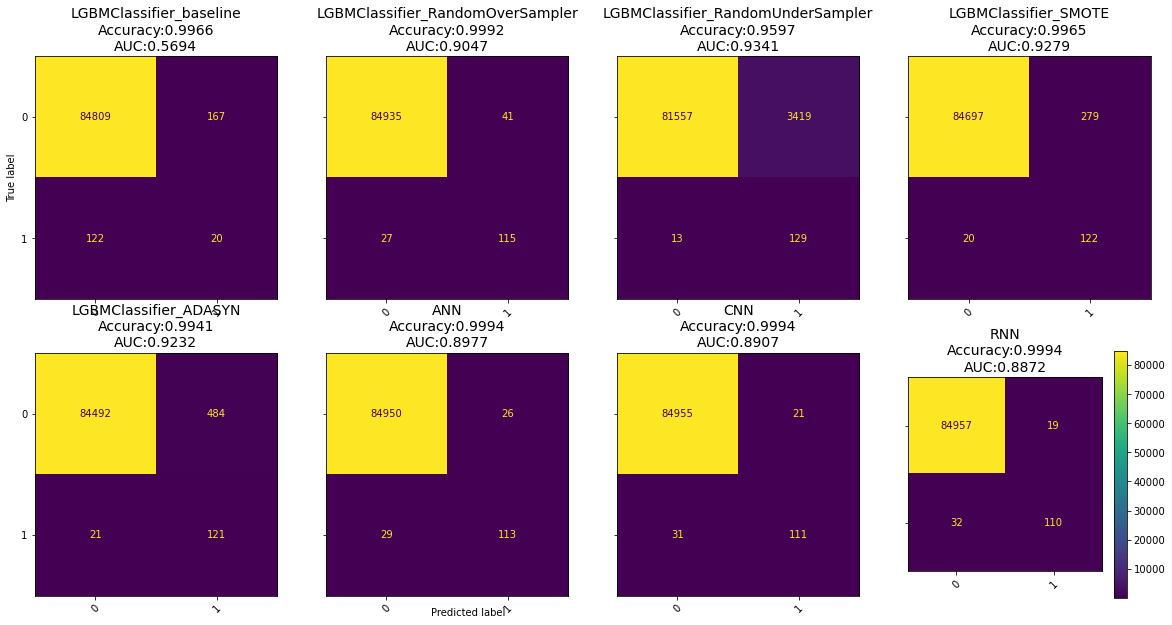

In [87]:
mtap.display_all_confusion_matrices(y_test)

In [88]:
"Added feature selection (corr) and outlier suppression to baseline."

'Added feature selection (corr) and outlier suppression to baseline.'